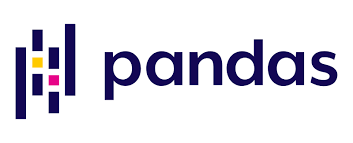

# Intro Pandas

En un nivel muy básico, los objetos Pandas pueden ser considerados como **versiones mejoradas de los arrays estructurados de NumPy en los que las filas y columnas se identifican con etiquetas en lugar de simples índices enteros.**
Como veremos en el transcurso de este capítulo, Pandas proporciona una gran cantidad de herramientas útiles, métodos y funcionalidad sobre las estructuras de datos básicas, pero **casi todo lo que sigue requerirá una comprensión de lo que son estas estructuras**.
Por lo tanto, antes de seguir adelante, vamos a introducir estas tres estructuras de datos fundamentales de Pandas: la ``Serie``, ``DataFrame``, y ``Index``.

Comenzaremos nuestras sesiones de código con las importaciones estándar de NumPy y Pandas:

In [1]:
import numpy as np
import pandas as pd

## El objeto Serie de Pandas

Una ``Serie`` de Pandas es un array unidimensional de datos indexados.
Se puede crear a partir de una lista o un array de la siguiente manera:

In [2]:
# Heights of class
data = pd.Series([1.5, 1.6, 1.75, 1.80])
data

0    1.50
1    1.60
2    1.75
3    1.80
dtype: float64

Como vemos en la salida, la ``Serie`` envuelve tanto una secuencia de valores como una secuencia de índices, a los que podemos acceder con los atributos ``values`` e ``index``.
Los ``valores`` son simplemente una matriz NumPy:

In [3]:
data.values

array([1.5 , 1.6 , 1.75, 1.8 ])

El ``índice`` es un objeto tipo array del tipo ``pd.Index``, del que hablaremos con más detalle.

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

Al igual que con un array de NumPy, se puede acceder a los datos por el índice asociado mediante la conocida notación de corchetes de Python:

In [5]:
data

0    1.50
1    1.60
2    1.75
3    1.80
dtype: float64

In [6]:
data[1]

1.6

In [7]:
otra_serie = data[1:4].copy()
print(otra_serie)

1    1.60
2    1.75
3    1.80
dtype: float64


In [8]:
otra_serie[0:2]

1    1.60
2    1.75
dtype: float64

Sin embargo, como veremos, **la ``Serie`` de Pandas es mucho más general y flexible que el array unidimensional de NumPy** que emula.

### ``Series`` como matriz NumPy 

Por lo que hemos visto hasta ahora, puede parecer que el objeto ``Series`` es básicamente intercambiable con un array unidimensional de NumPy.
**La diferencia esencial es la presencia del índice**: mientras que el array de Numpy tiene un índice entero *implícitamente definido* que se utiliza para acceder a los valores, las ``Series`` de Pandas tienen un índice ***explícitamente definido*** asociado a los valores.

Esta definición explícita del índice proporciona al objeto ``Series`` capacidades adicionales. Por ejemplo, el índice no necesita ser un entero, sino que puede consistir en valores de cualquier tipo deseado.
Por ejemplo, **si lo deseamos, podemos utilizar cadenas como índice:**


In [9]:
data = pd.Series([1.5, 1.6, 1.75, 1.80],
                 index=['Jane', 'Joe', 'Susan', 'Mike'])
data

Jane     1.50
Joe      1.60
Susan    1.75
Mike     1.80
dtype: float64

In [10]:
data.values

array([1.5 , 1.6 , 1.75, 1.8 ])

In [11]:
np.array(data.index)

array(['Jane', 'Joe', 'Susan', 'Mike'], dtype=object)

Y el acceso al artículo funciona como se esperaba:

In [12]:
data[2]

/tmp/ipykernel_51383/1082122490.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[2]


1.75

In [13]:
data['Susan']

1.75

Incluso podemos utilizar índices no contiguos o no secuenciales:

In [14]:
data = pd.Series([1.5, 1.6, 1.75, 1.80],
                 index=[2, 5, 3, 7])
data

2    1.50
5    1.60
3    1.75
7    1.80
dtype: float64

In [15]:
data[0:2] # Slicing por posición

2    1.5
5    1.6
dtype: float64

In [16]:
data[2] # Selección por valor del índice

1.5

### Series como un diccionario especializado

De esta manera, puedes pensar en una ``Serie`` de Pandas como una especialización de un diccionario de Python.
Un diccionario es una estructura que asigna claves arbitrarias a un conjunto de valores arbitrarios, y una ``Serie`` es una estructura que asigna claves tipificadas a un conjunto de valores tipificados.
Esta tipificación es importante: al igual que el código compilado de tipo específico detrás de un array de NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de una ``Serie`` de Pandas la hace mucho más eficiente que los diccionarios de Python para ciertas operaciones.

La analogía entre ``Series`` y diccionario se puede hacer aún más clara construyendo un objeto ``Series`` directamente desde un diccionario de Python:

In [17]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
# print(population_dict)
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Por defecto, se creará una ``Serie`` donde el índice se extrae de las claves ordenadas.
A partir de aquí, se puede realizar el típico acceso a los elementos de estilo diccionario:

In [18]:
population_dict['California']

38332521

In [19]:
population['California']

38332521

Sin embargo, a diferencia de un diccionario, ``Series`` también admite operaciones de tipo matriz, como el corte:

In [20]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [21]:
population[0:4]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

### Construyendo objetos Series

Ya hemos visto algunas formas de construir una ``Serie`` de Pandas desde cero; todas ellas son alguna versión de lo siguiente:

```python
pd.Series(data, index=index)
```

donde ``índice`` es un argumento opcional, y ``datos`` puede ser una de muchas entidades.

Por ejemplo, ``data`` puede ser una lista o un array de NumPy, en cuyo caso ``index`` es por defecto una secuencia de enteros:

In [22]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` puede ser un escalar, que se repite para llenar el índice especificado:

In [23]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` puede ser un diccionario, en el que ``index`` es por defecto las claves ordenadas del diccionario:

In [24]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

En cada caso, el índice puede establecerse explícitamente si se prefiere un resultado diferente:

In [25]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Observe que, en este caso, la ``Serie`` se rellena sólo con las claves identificadas explícitamente.

<table align="left">
 <tr><td width="80"><img src="./img/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio series ventas</h3>

      
<ol>
    <li>Calcula el total de ventas para todo el año.</li>
    <li>Encuentra el mes con el mayor número de ventas.</li>
    <li>Encuentra el mes con el menor número de ventas.</li>
    <li>Calcula el promedio de ventas mensuales.</li>
    <li>Encuentra los meses en los que las ventas superaron el promedio.</li>
</ol>
         
 </td></tr>
</table>

In [26]:
# AQUÍ VA VUESTRO CÓDIGO

## El objeto Pandas DataFrame

La siguiente estructura fundamental en Pandas es el ``DataFrame``.
Al igual que el objeto ``Series`` de la sección anterior, el ``DataFrame`` puede ser **pensado como una generalización de un array de NumPy, o como una especialización de un diccionario de Python.**
Ahora echaremos un vistazo a cada una de estas perspectivas.

### DataFrame como matriz generalizada de NumPy
Si una ``Serie`` es un análogo de un array unidimensional con índices flexibles, un **``DataFrame`` es un análogo de un array bidimensional con índices de fila y nombres de columna flexibles.**
Al igual que se puede pensar en una matriz bidimensional como una secuencia ordenada de columnas unidimensionales alineadas, se puede pensar en un ``DataFrame`` como una secuencia de objetos ``Series`` alineados.
Aquí, por "alineado" queremos decir que **comparten el mismo índice.**

Para demostrarlo, construyamos primero una nueva ``Serie`` que enumere el área de cada uno de los cinco estados discutidos en la sección anterior:

In [27]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [28]:
print(area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


Ahora que tenemos esto junto con la serie ``población`` de antes, podemos utilizar un diccionario para construir un único objeto bidimensional que contenga esta información:

In [29]:
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [30]:
print(area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [31]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

Al igual que el objeto ``Series``, el ``DataFrame`` tiene un atributo ``index`` que da acceso a las etiquetas del índice:


In [32]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Además, el ``DataFrame`` tiene un atributo ``columns``, que es un objeto ``Index`` que contiene las etiquetas de las columnas:

In [33]:
states.columns

Index(['population', 'area'], dtype='object')

In [34]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

**De este modo, el ``DataFrame`` puede considerarse como una generalización de una matriz NumPy bidimensional, en la que tanto las filas como las columnas tienen un índice generalizado para acceder a los datos.**

### DataFrame como diccionario especializado

Del mismo modo, también podemos pensar en un ``DataFrame`` como una especialización de un diccionario.
Mientras que un diccionario asigna una clave a un valor, un ``DataFrame`` asigna un nombre de columna a una ``Serie`` de datos de columna.
Por ejemplo, pedir el atributo ``área`` devuelve el objeto ``Series`` que contiene las áreas que vimos anteriormente:

In [35]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

**Observa el potencial punto de confusión aquí: en un array NumPy de dos dimensiones, ``data[0]`` devolverá la primera *fila*. Para un ``DataFrame``, ``data['col0']`` devolverá la primera *columna*.**
Por ello, probablemente sea mejor pensar en los ``DataFrame`` como diccionarios generalizados en lugar de arrays generalizados, aunque ambas formas de ver la situación pueden ser útiles.
Exploraremos medios más flexibles para indexar ``DataFrame`` en [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

Un ``DataFrame`` de Pandas se puede construir de varias maneras. Veremos varios ejemplos.

#### A partir de un único objeto Serie

Un ``DataFrame`` es una colección de objetos ``Series``, y se puede construir un ``DataFrame`` de una sola columna a partir de una única ``Series``:

In [36]:
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [37]:
pd.DataFrame(data=population, columns=['population'])

population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135

#### A partir de una lista de diccionarios

Cualquier lista de dictos puede convertirse en un ``DataFrame``.
Utilizaremos una simple comprensión de la lista para crear algunos datos:

In [38]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
print(data)
pd.DataFrame(data)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


a  b
0  0  0
1  1  2
2  2  4

Incluso si faltan algunas claves en el diccionario, Pandas las rellenará con valores ``NaN`` (es decir, "no un número"):

In [39]:
pd.DataFrame([{'a': 1, 'b': 2}, 
              {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

#### A partir de un diccionario de objetos Serie

Como vimos antes, un ``DataFrame`` puede construirse también a partir de un diccionario de objetos ``Series``:

In [40]:
pd.DataFrame({'population': population,
              'area': area})

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

#### A partir de un array bidimensional de NumPy

Dado un array bidimensional de datos, podemos crear un ``DataFrame`` con los nombres de columna e índice que se especifiquen.
Si se omite, se utilizará un índice entero para cada una:

In [41]:
np.random.seed(10)
np.random.rand(3, 2)

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665]])

In [42]:
np.random.seed(10)
x = pd.DataFrame(np.random.rand(3, 2),
             columns=['Columna_1', 'Columna_2'],
             index=['a', 'b', 'c'])

In [43]:
x

Columna_1  Columna_2
a   0.771321   0.020752
b   0.633648   0.748804
c   0.498507   0.224797

In [44]:
x = x.reset_index()
x

index  Columna_1  Columna_2
0     a   0.771321   0.020752
1     b   0.633648   0.748804
2     c   0.498507   0.224797

In [45]:
x.index = [5,6,7]
x

index  Columna_1  Columna_2
5     a   0.771321   0.020752
6     b   0.633648   0.748804
7     c   0.498507   0.224797

In [46]:
x = x.reset_index(drop=True)
x

index  Columna_1  Columna_2
0     a   0.771321   0.020752
1     b   0.633648   0.748804
2     c   0.498507   0.224797

####  De un array estructurado de NumPy

Un ``DataFrame`` de Pandas funciona de forma muy parecida a un array estructurado, y se puede crear directamente a partir de uno:

In [47]:
import numpy as np
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8'), ('C', 'f8')])
A

array([(0, 0., 0.), (0, 0., 0.), (0, 0., 0.)],
      dtype=[('A', '<i8'), ('B', '<f8'), ('C', '<f8')])

In [48]:
pd.DataFrame(A)

A    B    C
0  0  0.0  0.0
1  0  0.0  0.0
2  0  0.0  0.0

<table align="left">
 <tr><td width="80"><img src="./img/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio dataframes ventas</h3>

      
<ol>
    <li>Crea un dataframe con las ventas de las diferentes tiendas y su índice de meses</li>
    <li>¿Cuál es la tienda que más ventas ha tenido en un mes?</li>
    <li>¿Cuál es la tienda que mayor promedio de ventas tiene?</li>
    <li>Calcula una nueva columna con el total de ventas de todas las tiendas.</li>
    <li>¿Cuál ha sido el mes con más ventas?</li>
</ol>
         
 </td></tr>
</table>

In [49]:
# AQUÍ VA VUESTRO CÓDIGO

## El objeto Index de Pandas

Hemos visto aquí que tanto los objetos ``Series`` como ``DataFrame`` contienen un *índice* explícito que permite referenciar y modificar los datos.
Este objeto ``Index`` es una estructura interesante en sí misma, y **puede ser considerada como un *array inmutable* o como un *conjunto ordenado* (técnicamente un multi-conjunto, ya que los objetos ``Index`` pueden contener valores repetidos)**.
Estos puntos de vista tienen algunas consecuencias interesantes en las operaciones disponibles en los objetos ``Index``.
Como ejemplo sencillo, construyamos un ``Index`` a partir de una lista de enteros:

In [50]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

### Index como array inmutable

El ``Index`` en muchos aspectos funciona como un array.
Por ejemplo, podemos utilizar la notación de indexación estándar de Python para recuperar valores o trozos:

In [51]:
ind[1]

3

In [52]:
ind[::2]

Index([2, 5, 11], dtype='int64')

Los objetos ``Index`` también tienen muchos de los atributos conocidos de las matrices de NumPy:

In [53]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Una diferencia entre los objetos ``Index`` y las matrices de NumPy es que los índices son inmutables, es decir, no pueden ser modificados por los medios normales:

In [54]:
ind[1] = 0

TypeError: Index does not support mutable operations

**Esta inmutabilidad hace que sea más seguro compartir índices entre múltiples ``DataFrame`` y arrays, sin el potencial de efectos secundarios de la modificación inadvertida del índice.**

### Index como conjunto ordenado (set)

Los objetos Pandas están diseñados para facilitar operaciones como las uniones entre conjuntos de datos, que dependen de muchos aspectos de la aritmética de conjuntos.
**El objeto ``Index`` sigue muchas de las convenciones utilizadas por la estructura de datos ``set`` incorporada en Python, de modo que las uniones, intersecciones, diferencias y otras combinaciones pueden ser calculadas de una manera familiar:**

In [55]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
# indA & indB  # intersection

In [ ]:
# indA | indB  # union

También se puede acceder a estas operaciones mediante métodos de objetos, por ejemplo ``indA.intersection(indB)``.

# Data Indexing and Selection

Hemos visto en detalle los métodos y herramientas para acceder, establecer y modificar valores en arrays de NumPy.
Estos incluyen la indexación (por ejemplo, ``arr[2, 1]``), el slicing (por ejemplo, ``arr[:, 1:5]``), la mascara (por ejemplo, ``arr[arr > 0]``), la indexación de lujo (por ejemplo, ``arr[0, [1, 5]]``), y combinaciones de los mismos (por ejemplo, ``arr[:, [1, 5]]``).
**Aquí veremos medios similares para acceder y modificar valores en los objetos Pandas ``Series`` y ``DataFrame``.
Si has utilizado los patrones de NumPy, los patrones correspondientes en Pandas te resultarán muy familiares, aunque hay algunas peculiaridades que debes tener en cuenta.

Empezaremos con el caso simple del objeto ``Series`` unidimensional, y luego pasaremos al más complicado objeto ``DataFrame`` bidimensional.


## Data Selection in Series

Como vimos en la sección anterior, un objeto **`Series`` actúa en muchos aspectos como un array unidimensional de NumPy, y en muchos aspectos como un diccionario estándar de Python.**
Si tenemos en cuenta estas dos analogías superpuestas, nos ayudará a entender los patrones de indexación y selección de datos en estas matrices.


### Series como un diccionario

Al igual que un diccionario, el objeto ``Series`` proporciona un mapeo de una colección de claves a una colección de valores:

In [56]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [57]:
data['b']

0.5

También podemos utilizar expresiones y métodos de Python tipo diccionario para examinar las claves/índices y los valores:

In [58]:
'b' in data

True

In [59]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [60]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [61]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Los objetos ``Series`` pueden incluso modificarse con una sintaxis similar a la de un diccionario.
Al igual que se puede ampliar un diccionario asignando una nueva clave, se puede ampliar una ``Serie`` asignando un nuevo valor de índice:

In [62]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Esta fácil mutabilidad de los objetos es una característica conveniente: bajo el capó, Pandas está tomando decisiones sobre la disposición de la memoria y la copia de datos que podría tener lugar; el usuario generalmente no necesita preocuparse por estas cuestiones.

### Series como un array unidimensiona

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.
Examples of these are as follows:

In [63]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [64]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [65]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [66]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [67]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Entre ellos, el slicing puede ser la fuente de mayor confusión.
**Tenga en cuenta que cuando se hace slicing con un índice explícito (es decir, ``data['a':'c']``), el índice final se *incluye* en el slicing, mientras que cuando se hace slicing con un índice implícito (es decir, ``datos[0:2]``), el índice final se *excluye* del slicing.**

### Indexers: loc, iloc, and ix

Estas convenciones de corte e indexación pueden ser una fuente de confusión.
Por ejemplo, si tu ``Serie`` tiene un índice entero explícito, una operación de indexación como **``data[1]`` utilizará los índices explícitos, mientras que una operación de slicing como ``data[1:3]`` utilizará el índice implícito de estilo Python.**

In [68]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [69]:
# explicit index when indexing
data[1]

'a'

In [70]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Debido a esta potencial confusión en el caso de los índices enteros, Pandas proporciona algunos atributos *indexadores* especiales que exponen explícitamente ciertos esquemas de indexación.
No se trata de métodos funcionales, sino de atributos que exponen una interfaz de slicing particular a los datos de la ``Serie``.

En primer lugar, el atributo **``loc`` permite la indexación y el slice que siempre hace referencia al índice explícito:**

In [71]:
data

1    a
3    b
5    c
dtype: object

In [72]:
data.loc[1:3]
# data[1:3]

1    a
3    b
dtype: object

In [73]:
data.loc[1]

'a'

In [74]:
data.loc[1:3]

1    a
3    b
dtype: object

El atributo ``iloc`` permite la indexación y el corte que siempre hace referencia al índice implícito de estilo Python:

In [75]:
data

1    a
3    b
5    c
dtype: object

In [76]:
data.iloc[1]

'b'

In [77]:
data.iloc[1:2]

3    b
dtype: object

Un tercer atributo de indexación, ``ix``, es un híbrido de los dos, y para los objetos ``Series`` es equivalente a la indexación estándar basada en ``[]``.
El propósito del indexador ``ix`` se hará más evidente en el contexto de los objetos ``DataFrame``, que discutiremos en un momento.

Un principio rector del código Python es que "lo explícito es mejor que lo implícito".
La naturaleza explícita de ``loc`` y ``iloc`` los hace muy útiles para mantener un código limpio y legible; especialmente en el caso de los índices de enteros, **recomiendo usarlos tanto para hacer el código más fácil de leer y entender, como para prevenir errores sutiles debido a la convención de indexación/corte mixto.**

## Data Selection in DataFrame

Recordemos que un ``DataFrame`` actúa en muchos aspectos como una matriz bidimensional o estructurada, y en otros aspectos como un diccionario de estructuras ``Series`` que comparten el mismo índice.
Estas analogías pueden ser útiles para tener en cuenta mientras exploramos la selección de datos dentro de esta estructura.

### DataFrame como un diccionario

La primera analogía que consideraremos es el ``DataFrame`` como diccionario de objetos ``Series`` relacionados.
Volvamos a nuestro ejemplo de áreas y poblaciones de los estados:

In [78]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
# cities = pd.Series({'California': "Sacramento", 'Texas': "Otra ciudad 1",
#                  'New York': "Albany", 'Florida': "Miami",
#                  'Illinois': "Otra ciudad 2"})
data = pd.DataFrame({'area':area, 'pop':pop})
data

area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135

In [79]:
data.reset_index()

index    area       pop
0  California  423967  38332521
1       Texas  695662  26448193
2    New York  141297  19651127
3     Florida  170312  19552860
4    Illinois  149995  12882135

Se puede acceder a las ``Series`` individuales que componen las columnas del ``DataFrame`` a través de la indexación de estilo diccionario del nombre de la columna:

In [80]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

De forma equivalente, podemos utilizar un acceso de tipo atributo con nombres de columna que sean cadenas:

In [82]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Este acceso a la columna de estilo atributo accede en realidad al mismo objeto que el acceso de estilo diccionario:

In [142]:
data.area is data['area']

True

Aunque esta es una abreviatura útil, tenga en cuenta que no funciona para todos los casos.
Por ejemplo, **si los nombres de las columnas no son cadenas, o si los nombres de las columnas entran en conflicto con los métodos del ``DataFrame``, este acceso tipo atributo no es posible.**
Por ejemplo, el ``DataFrame`` tiene un método ``pop()``, por lo que ``data.pop`` apuntará a éste en lugar de a la columna ``"pop"``:

In [83]:
data.pop

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

In [84]:
data.pop is data['pop']

False

En particular, debe evitar la tentación de intentar la asignación de columnas a través de atributos (es decir, utilice ``datos['pop'] = z`` en lugar de ``datos.pop = z``).

Al igual que con los objetos ``Series`` discutidos anteriormente, esta sintaxis de estilo diccionario también se puede utilizar para modificar el objeto, en este caso añadiendo una nueva columna:

In [144]:
data

area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135

In [31]:
data['density'] = data['pop'] / data['area']
data

area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

Esto muestra una vista previa de la sintaxis directa de la aritmética elemento por elemento entre los objetos ``Series``; profundizaremos en esto en [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb).

### DataFrame como un array bidimensional

Como se ha mencionado anteriormente, también podemos ver el ``DataFrame`` como un array bidimensional mejorado.
Podemos examinar la matriz de datos subyacente utilizando el atributo ``values``:

In [32]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

Se pueden hacer muchas observaciones familiares tipo array en el propio ``DataFrame``.
**Por ejemplo, podemos transponer el ``DataFrame`` completo para intercambiar filas y columnas:**

In [33]:
data.T

California         Texas      New York       Florida      Illinois
area     4.239670e+05  6.956620e+05  1.412970e+05  1.703120e+05  1.499950e+05
pop      3.833252e+07  2.644819e+07  1.965113e+07  1.955286e+07  1.288214e+07
density  9.041393e+01  3.801874e+01  1.390767e+02  1.148061e+02  8.588376e+01

Sin embargo, cuando se trata de indexar objetos ``DataFrame``, está claro que la indexación de las columnas al estilo de un diccionario impide nuestra **capacidad de tratarlo simplemente como un array de NumPy.**
En particular, al pasar un solo índice a un array se accede a una fila:

In [149]:
data

area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

In [34]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

y pasando un único "índice" a un ``DataFrame`` se accede a una columna:

In [150]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Por lo tanto, para la indexación estilo array, necesitamos otra convención.
Aquí Pandas vuelve a utilizar los indexadores ``loc``, ``iloc`` y ``ix`` mencionados anteriormente.
Usando el indexador ``iloc``, podemos indexar el array subyacente como si fuera un simple array de NumPy (usando el índice implícito de estilo Python), pero el índice ``DataFrame`` y las etiquetas de las columnas se mantienen en el resultado:

In [154]:
data

area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

In [35]:
data.iloc[:4, 1:3]

pop     density
California  38332521   90.413926
Texas       26448193   38.018740
New York    19651127  139.076746
Florida     19552860  114.806121

Del mismo modo, utilizando el indexador ``loc`` podemos indexar los datos subyacentes en un estilo similar al de los arrays pero utilizando el índice explícito y los nombres de las columnas:

In [88]:
data

area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

In [36]:
data.loc['Texas':'New York', 'pop':'density']

pop     density
Texas     26448193   38.018740
New York  19651127  139.076746

Cualquiera de los patrones de acceso a los datos de estilo NumPy puede ser utilizado dentro de estos indexadores.
Por ejemplo, en el indexador ``loc`` podemos combinar el enmascaramiento y la indexación de fantasía como en lo siguiente:

In [37]:
data.density > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [158]:
data.loc[data.density > 100, ['pop', 'density']]

pop     density
New York  19651127  139.076746
Florida   19552860  114.806121

In [38]:
data.iloc[[0,2] ,[0,2]]

area     density
California  423967   90.413926
New York    141297  139.076746

Cualquiera de estas convenciones de indexación también se puede utilizar para establecer o modificar valores; esto se hace de la manera estándar a la que podría estar acostumbrado de trabajar con NumPy:

In [159]:
data

area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

In [40]:
data.iloc[0, 2] = 90
data

area       pop     density
California  423967  38332521   90.000000
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

Para mejorar tu fluidez en la manipulación de datos de Pandas, te sugiero que pases algún tiempo con un simple ``DataFrame`` y explores los tipos de indexación, corte, enmascaramiento e indexación de fantasía que permiten estos diversos enfoques de indexación.

### Otras convenciones de indexación

Hay un par de convenciones de indexación adicionales que pueden parecer contrarias a la discusión anterior, pero que sin embargo pueden ser muy útiles en la práctica. En primer lugar, mientras que la indexación se refiere a las columnas, el corte se refiere a las filas.

In [41]:
data['Florida':'Illinois']

area       pop     density
Florida   170312  19552860  114.806121
Illinois  149995  12882135   85.883763

In [42]:
data.loc[:, 'area':'density']

area       pop     density
California  423967  38332521   90.000000
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763

Estos slices también pueden referirse a las filas por número en lugar de por índice:


In [43]:
data[1:3]

area       pop     density
Texas     695662  26448193   38.018740
New York  141297  19651127  139.076746

Del mismo modo, las operaciones de enmascaramiento directo también se interpretan por filas en lugar de por columnas:

In [44]:
data[data.density > 100]

area       pop     density
New York  141297  19651127  139.076746
Florida   170312  19552860  114.806121

Estas dos convenciones son sintácticamente similares a las de un array de NumPy, y aunque no se ajusten precisamente al molde de las convenciones de Pandas, son sin embargo bastante útiles en la práctica.

#  Operar con datos en Pandas

Una de las piezas esenciales de NumPy es la capacidad de realizar operaciones rápidas entre elementos, tanto con aritmética básica (suma, resta, multiplicación, etc.) como con operaciones más sofisticadas (funciones trigonométricas, exponenciales y logarítmicas, etc.).
**Pandas hereda gran parte de esta funcionalidad de NumPy, y las ufuncs** son clave para ello.

Para las operaciones unitarias (ufuncs) como la negación y las funciones trigonométricas, estas ufuncs *preservarán las etiquetas de índice y columna* en la salida, y para las operaciones binarias como **la adición y la multiplicación, Pandas *alineará automáticamente los índices* al pasar los objetos a la ufunc.**
Esto significa que mantener el contexto de los datos y combinar datos de diferentes fuentes -ambas tareas potencialmente propensas a errores con arrays NumPy en bruto- se convierten en tareas esencialmente infalibles con Pandas.
Además, veremos que hay operaciones bien definidas entre estructuras unidimensionales ``Series`` y estructuras bidimensionales ``DataFrame``.

## Ufuncs: Index Preservation

Como Pandas está diseñado para trabajar con NumPy, cualquier ufunc de NumPy funcionará con los objetos ``Series`` y ``DataFrame`` de Pandas.
Empecemos definiendo una simple ``Serie`` y ``DataFrame`` en la que demostrar esto:

In [45]:
import pandas as pd
import numpy as np

In [46]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [47]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4

Si aplicamos una ufunc NumPy sobre cualquiera de estos objetos, el resultado será otro objeto Pandas *con los índices conservados:*

In [48]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

O, para un cálculo un poco más complejo:

In [49]:
np.sin(df * np.pi / 4)

A             B         C             D
0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
2 -0.707107  1.000000e+00 -0.707107  1.224647e-16

## UFuncs: Index Alignment

Para operaciones binarias sobre dos objetos ``Series`` o ``DataFrame``, Pandas alineará los índices en el proceso de realización de la operación.
Esto es muy conveniente cuando se trabaja con datos incompletos, como veremos en algunos de los ejemplos que siguen.

### Index alignment in Series

Como ejemplo, supongamos que combinamos dos fuentes de datos diferentes y encontramos sólo los tres primeros estados de EE.UU. por *área* y los tres primeros estados de EE.UU. por *población*:

In [50]:
area = pd.Series({'Alaska': 1723337,
                  'Texas': 695662,
                  'California': 423967},
                 name='area')

population = pd.Series({'California': 38332521,
                        'Texas': 26448193,
                        'New York': 19651127},
                       name='population')

Veamos qué ocurre cuando los dividimos para calcular la densidad de población:

In [51]:
type(population / area)

pandas.core.series.Series

In [52]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [53]:
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [54]:
s_poblacion_area = population / area
print(s_poblacion_area)

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64


El array resultante contiene la *unión* de los índices de los dos arrays de entrada, que podría determinarse utilizando la aritmética de conjuntos estándar de Python sobre estos índices:

In [106]:
area.index

Index(['Alaska', 'Texas', 'California'], dtype='object')

In [107]:
population.index

Index(['California', 'Texas', 'New York'], dtype='object')

In [109]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Cualquier elemento para el que uno u otro no tenga una entrada se marca con ``NaN``, o "Not a Number", que es como Pandas marca los datos que faltan.
Esta coincidencia de índices se implementa de esta manera para cualquiera de las expresiones aritméticas incorporadas de Python; cualquier valor que falte se rellena con NaN por defecto:

In [55]:
A = pd.Series([2, 4, 6], index=["andalucia", "aragon", "madrid"])
print(A)
B = pd.Series([1, 3, 5], index=["aragon", "madrid", "asturias"])
print(B)
A + B

andalucia    2
aragon       4
madrid       6
dtype: int64
aragon      1
madrid      3
asturias    5
dtype: int64


andalucia    NaN
aragon       5.0
asturias     NaN
madrid       9.0
dtype: float64

In [57]:
df_AB = pd.DataFrame({'n_alumnos': A, 'n_profesores': B})
df_AB

n_alumnos  n_profesores
andalucia        2.0           NaN
aragon           4.0           1.0
asturias         NaN           5.0
madrid           6.0           3.0

In [58]:
# df_AB = pd.DataFrame({'n_alumnos': A, 'n_profesores': B})
df_AB['n_personas'] = df_AB['n_alumnos'] + df_AB['n_profesores']
df_AB

n_alumnos  n_profesores  n_personas
andalucia        2.0           NaN         NaN
aragon           4.0           1.0         5.0
asturias         NaN           5.0         NaN
madrid           6.0           3.0         9.0

In [59]:
df_AB['n_alumnos_10'] = df_AB['n_alumnos'] * 10
df_AB

n_alumnos  n_profesores  n_personas  n_alumnos_10
andalucia        2.0           NaN         NaN          20.0
aragon           4.0           1.0         5.0          40.0
asturias         NaN           5.0         NaN           NaN
madrid           6.0           3.0         9.0          60.0

Si el uso de valores NaN no es el comportamiento deseado, el valor de llenado puede ser modificado usando métodos de objetos apropiados en lugar de los operadores.
Por ejemplo, llamar a ``A.add(B)`` es equivalente a llamar a ``A + B``, pero permite la especificación explícita opcional del valor de relleno para cualquier elemento de ``A`` o ``B`` que pueda faltar:

In [60]:
B + A

andalucia    NaN
aragon       5.0
asturias     NaN
madrid       9.0
dtype: float64

In [115]:
print(A)
print(B)

andalucia    2
aragon       4
madrid       6
dtype: int64
aragon      1
madrid      3
asturias    5
dtype: int64


In [61]:
A.add(B, fill_value=0)

andalucia    2.0
aragon       5.0
asturias     5.0
madrid       9.0
dtype: float64

### Index alignment in DataFrame

Un tipo de alineación similar tiene lugar para *tanto* las columnas como los índices cuando se realizan operaciones en ``DataFrame``:

In [62]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

A   B
0  1  11
1  5   1

In [63]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

B  A  C
0  4  0  9
1  5  8  0
2  9  2  6

In [64]:
A + B

A     B   C
0   1.0  15.0 NaN
1  13.0   6.0 NaN
2   NaN   NaN NaN

Observe que los índices se alinean correctamente independientemente de su orden en los dos objetos, y los índices en el resultado están ordenados.
Al igual que en el caso de ``Series``, podemos utilizar el método aritmético del objeto asociado y pasarle cualquier ``valor de relleno`` que queramos utilizar en lugar de las entradas que falten.
Aquí rellenaremos con la media de todos los valores de ``A`` (calculada apilando primero las filas de ``A``):

In [65]:
fill = A.values.mean()
A.add(B, fill_value=fill)

A     B     C
0   1.0  15.0  13.5
1  13.0   6.0   4.5
2   6.5  13.5  10.5

La siguiente tabla lista los operadores de Python y sus métodos equivalentes de los objetos de Pandas:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operaciones entre DataFrame y Series

Cuando se realizan operaciones entre un ``DataFrame`` y una ``Serie``, la alineación de los índices y las columnas se mantiene de forma similar.
Las operaciones entre un ``DataFrame`` y una ``Serie`` son similares a las operaciones entre un array bidimensional y uno unidimensional de NumPy.
Consideremos una operación común, donde encontramos la diferencia de un array bidimensional y una de sus filas:

In [121]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [122]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

La resta entre un array bidimensional y una de sus filas se aplica por filas.

En Pandas, la convención opera de forma similar en las filas por defecto:

In [123]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

Q  R  S  T
0  0  0  0  0
1 -1 -2  2  4
2  3 -7  1  4

Si, en cambio, desea operar por columnas, puede utilizar los métodos del objeto mencionados anteriormente, especificando el argumento ``axis``:

In [124]:
df.subtract(df['R'], axis=0)

Q  R  S  T
0 -5  0 -6 -4
1 -4  0 -2  2
2  5  0  2  7

Tenga en cuenta que estas operaciones ``DataFrame``/``Series``, al igual que las operaciones comentadas anteriormente, alinearán automáticamente los índices entre los dos elementos:

In [125]:
df

Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8

In [126]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [127]:
df - halfrow

Q   R    S   T
0  0.0 NaN  0.0 NaN
1 -1.0 NaN  2.0 NaN
2  3.0 NaN  1.0 NaN

Esta preservación y alineación de índices y columnas significa que las operaciones sobre los datos en Pandas siempre mantendrán el contexto de los datos, lo que evita los tipos de errores tontos que podrían surgir al trabajar con datos heterogéneos y/o mal alineados en arrays NumPy en bruto.